# Logistic Regression with Python
## Import Libraries

In [77]:
import numpy as np                        ## Main Library
import pandas as pd                       ## Main Library
import matplotlib.pyplot as plt           ## Plotting Graphs
%matplotlib inline
from patsy import dmatrices                
import sklearn                            ## Used for Building model
import seaborn as sns                     ## Statistical plotting
import statsmodels.api as sm              ##Statistical Features
from scipy import stats
import warnings                           ## Remove warnings
warnings.filterwarnings("ignore")
from scipy.special import factorial

# The Data

Let's start by reading in the Attrition.csv file into a pandas dataframe.

In [78]:
## Importing Data
dataframe=pd.read_csv(r"C://Users//Prachi Gopalani//Desktop//Phyton programming course//IBM Attrition Data.csv")

In [79]:
## Top 5 Rows
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [80]:
## Display all column names
names = dataframe.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


# Exploratory Data Analysis

Let's begin some exploratory data analysis!

## Find the age distribution of employees in IBM

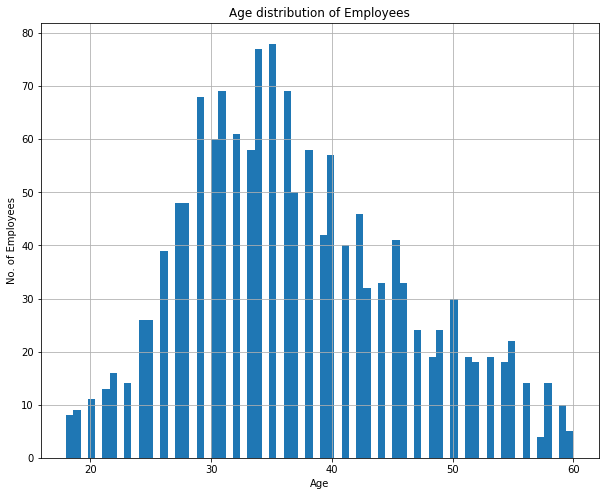

In [86]:
# histogram for age
plt.figure(figsize=(10,8))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("No. of Employees")
plt.show()

## Explore attrition by age

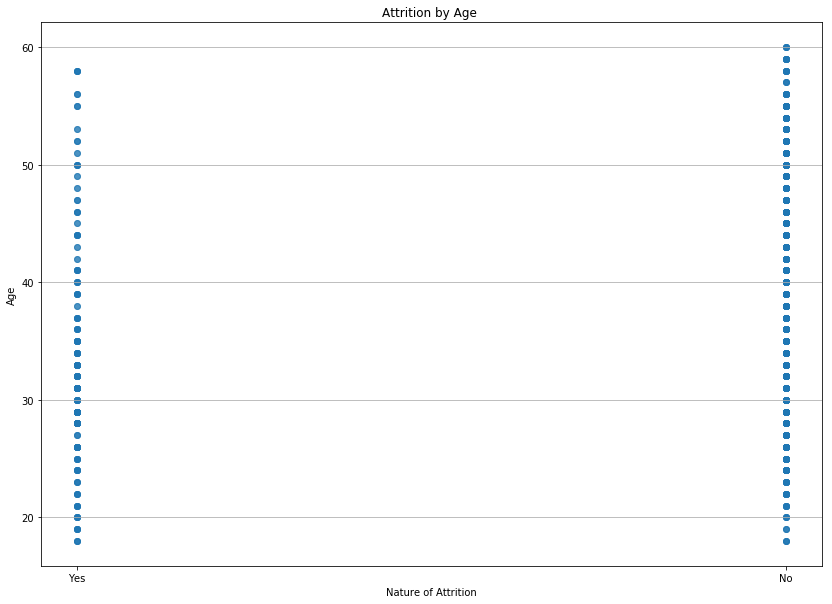

In [82]:
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.xlabel("Nature of Attrition")
plt.grid(b=True, which='major',axis='y')
plt.show()

## Explore data for Left employees breakdown

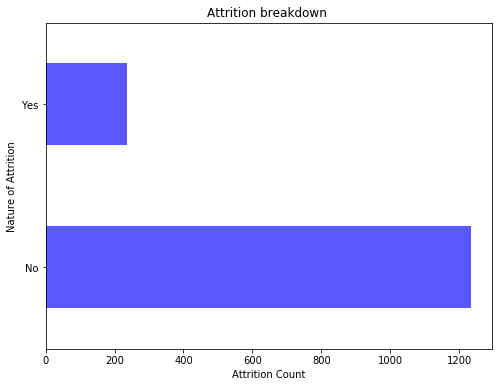

In [83]:
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title("Attrition breakdown ")
plt.ylabel("Nature of Attrition")
plt.xlabel("Attrition Count")
plt.show()

## Explore data for Education Field distribution


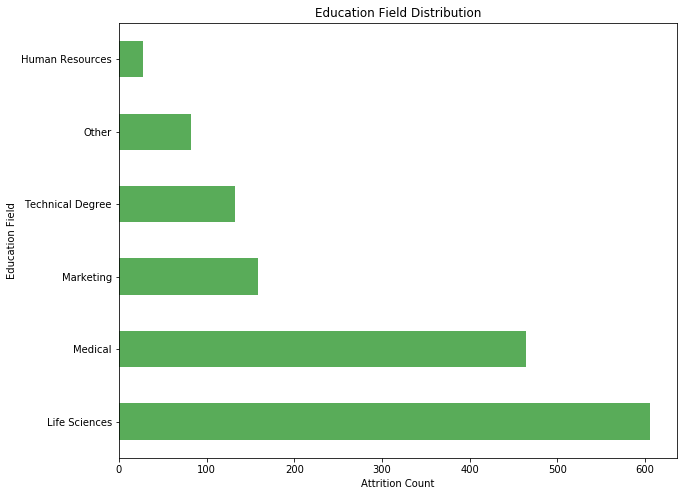

In [84]:
plt.figure(figsize=(10,8))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.ylabel("Education Field")
plt.xlabel("Attrition Count")
plt.show()

## Explore data for Marital Status

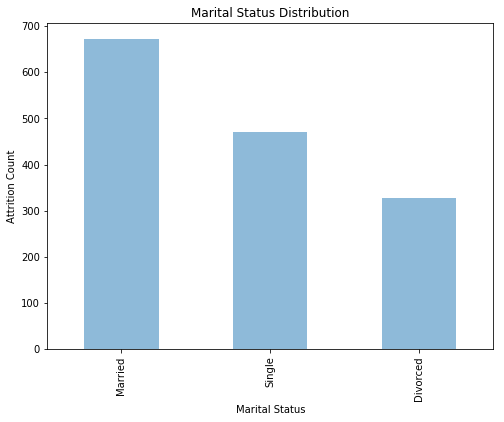

In [85]:
plt.figure(figsize=(8,6))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.title("Marital Status Distribution")
plt.ylabel("Attrition Count")
plt.xlabel("Marital Status")
plt.show()

In [144]:
## Descrition
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [145]:
## Data Information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
WorkLifeBalance            1470 non-null int64
YearsAtCompany             1470 non-null int64
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [146]:
## Standard Deviation of all attributes
dataframe.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

# Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [147]:
dataframe = pd.get_dummies(dataframe, columns=['Attrition','EducationField','Department','MaritalStatus'], drop_first=True)
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,0,1,0,0,1,0,1,0


## Correalation Plot

In [148]:
dataframe.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309,-0.159205,0.016824,0.038162,-0.006354,-0.041466,-0.027604,0.017883,-0.027549,0.083919,-0.119185
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508,0.077924,-0.024499,0.039294,0.013486,-0.007969,-0.014802,-0.008117,0.014085,0.030232,-0.027445
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114,-0.031373,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.018604,0.014215,-0.001865,0.004168
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458,-0.103369,-0.024526,0.000479,-0.021299,0.064602,0.027713,0.027976,-0.025606,-0.022180,0.009035
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803,-0.103481,0.052004,-0.023528,-0.022645,0.003380,-0.019795,-0.002798,0.013499,-0.010315,0.024571
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285,-0.159840,-0.007054,0.062576,0.001025,-0.022279,-0.049695,-0.064720,0.063978,0.056767,-0.089361
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421,0.043494,-0.006131,-0.018611,0.024826,-0.012870,-0.013819,0.022237,-0.032097,-0.016142,-0.019161
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089,-0.063939,-0.039728,0.018500,0.001641,0.031812,0.021962,-0.069922,0.051320,-0.006388,0.014921
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000,-0.134392,-0.002019,0.031365,0.010805,-0.030331,-0.021399,-0.032181,0.029805,0.044925,-0.070935
Attrition_Yes,-0.159205,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,-0.063939,-0.134392,1.000000,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.085293,0.080855,-0.090984,0.175419


In [149]:
y=dataframe['Attrition_Yes']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

In [150]:
## Features for training and testing purpose(Indepedndent variable)
x = dataframe.loc[:, dataframe.columns != 'Attrition_Yes']
x.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,1,0,0,1,0,1,0


## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [151]:
## Satistical Analysis
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Attrition_Yes   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           8.80e-29
Time:                        18:48:33   Log-Likelihood:                -524.50
No. Observations:                1470   AIC:                             1087.
Df Residuals:                    1451   BIC:                             1188.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [152]:
X = dataframe[['Age','EnvironmentSatisfaction','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','JobSatisfaction',
               'MaritalStatus_Single','WorkLifeBalance']]
X.head()

,Age,EnvironmentSatisfaction,MonthlyIncome,DistanceFromHome,NumCompaniesWorked,JobSatisfaction,MaritalStatus_Single,WorkLifeBalance
0,41,2,5993,1,8,4,1,1
1,49,3,5130,8,1,2,0,3
2,37,4,2090,2,6,3,1,3
3,33,4,2909,3,1,3,0,3
4,27,1,3468,2,9,2,0,3


In [153]:
Y = dataframe['Attrition_Yes']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

In [154]:
Plot = X.corr()
Plot

,Age,EnvironmentSatisfaction,MonthlyIncome,DistanceFromHome,NumCompaniesWorked,JobSatisfaction,MaritalStatus_Single,WorkLifeBalance
Age,1.000000,0.010146,0.497855,-0.001686,0.299635,-0.004892,-0.119185,-0.021490
EnvironmentSatisfaction,0.010146,1.000000,-0.006259,-0.016075,0.012594,-0.006784,0.009035,0.027627
MonthlyIncome,0.497855,-0.006259,1.000000,-0.017014,0.149515,-0.007157,-0.089361,0.030683
DistanceFromHome,-0.001686,-0.016075,-0.017014,1.000000,-0.029251,-0.003669,-0.027445,-0.026556
NumCompaniesWorked,0.299635,0.012594,0.149515,-0.029251,1.000000,-0.055699,-0.019161,-0.008366
JobSatisfaction,-0.004892,-0.006784,-0.007157,-0.003669,-0.055699,1.000000,0.024571,-0.019459
MaritalStatus_Single,-0.119185,0.009035,-0.089361,-0.027445,-0.019161,0.024571,1.000000,0.014921
WorkLifeBalance,-0.021490,0.027627,0.030683,-0.026556,-0.008366,-0.019459,0.014921,1.000000


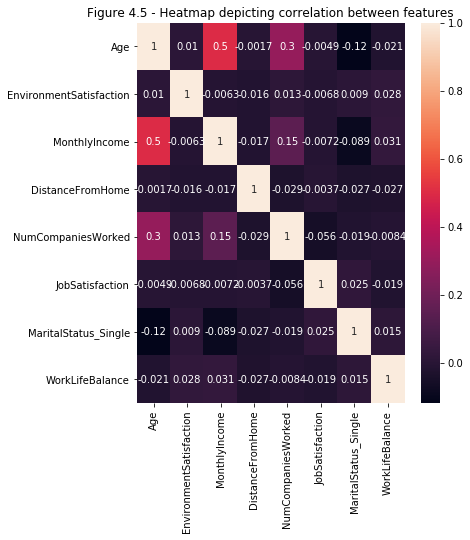

In [155]:
# Plot the heatmap for features with moore than 4
plt.figure( figsize = (6,7) )
sns.heatmap(Plot, annot = True );
plt.title( "Figure 4.5 - Heatmap depicting correlation between features");

# Train Test Split

In [156]:
## we split the data into training and testing sets
## Importing library of train & test data from sklearn
from sklearn.model_selection import train_test_split

In [157]:
## Spliting data in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1029, 8)
(441, 8)
(1029,)
(441,)


# Training and Predicting

In [158]:
## Importing logistic regression library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [159]:
## Bulding the LogR model 
## lbfgs is used to ignore future warnings
##Typically, the warning message itself will instruct you on the nature of the change and 
##how to change your code to address the warning.
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# Evaluation

In [160]:
## To minimize the residual sum of squares between the observed targets in the dataset.
print("Coefficients of the Logistic regression model")
coef = model_lr.coef_
intercept = model_lr.intercept_
print("Coef: ", coef)
print("Intercept: ", intercept)

Coefficients of the Logistic regression model
Coef:  [[-3.76379800e-02 -1.83723027e-01 -6.06134124e-05  4.44468947e-02
   1.17631279e-01 -2.07163923e-01  8.05088696e-01 -6.11825760e-02]]
Intercept:  [0.11288584]


In [161]:
## Predicting train set to calculate acuracy of LR model
predicted_classes_lr = model_lr.predict(X_train)

Confusion Matrix for LR model::
[[864   4]
 [155   6]]


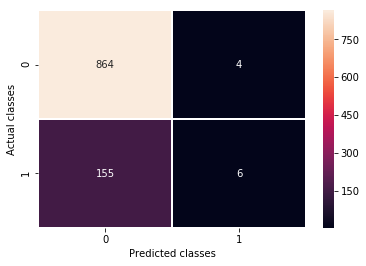

In [162]:
print("Confusion Matrix for LR model::")
conf_mat_lr = confusion_matrix(Y_train.tolist(),predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr,annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [163]:
# calculate accuracy scores for train sets
accuracy_lr = accuracy_score(Y_train,predicted_classes_lr)
print("accuracy score (train) for LR model::", accuracy_lr)

accuracy score (train) for LR model:: 0.8454810495626822


In [164]:
## Test SET
predicted_test_classes_lr = model_lr.predict(X_test)

In [165]:
## Confusion Matrix
print("Confusion Matrix (Test set) for LR model::")
conf_mat_test_lr = confusion_matrix(Y_test.tolist(),predicted_test_classes_lr)
print(conf_mat_test_lr)

Confusion Matrix (Test set) for LR model::
[[364   1]
 [ 74   2]]


In [166]:
accuracy_test_lr = accuracy_score(Y_test,predicted_test_classes_lr)
print("accuracy score - Log Reg (Test set)::", accuracy_test_lr)

accuracy score - Log Reg (Test set):: 0.8299319727891157


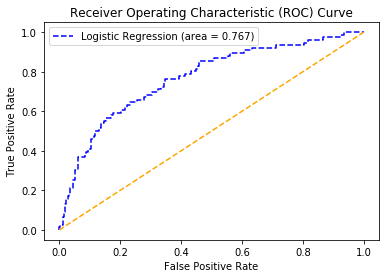

In [167]:
## ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()
logit_roc_auc = roc_auc_score(Y_test, model_lr.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1], drop_intermediate=False)
#, drop_intermediate=False
plt.plot(fpr, tpr, 'b--', label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------------------

# K Nearest Neighbors with Python

## Import Libraries


In [87]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

## Get the Data

In [88]:
## Importing Dataset
dataframe=pd.read_csv(r"C:\Users\Prachi Gopalani\Desktop\Phyton programming course\Advanced\IBM Attrition Data.csv")

In [89]:
##Top 5 rows
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


## Dummy Varibles

In [90]:
dataframe = pd.get_dummies(dataframe, columns=['Attrition','EducationField','Department','MaritalStatus'], drop_first=True)
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,0,1,0,0,1,0,1,0


## Relevant Features

In [91]:
## Chosen features after checking Significance level
feature_cols = ['Age','EnvironmentSatisfaction','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','JobSatisfaction',
               'MaritalStatus_Single','WorkLifeBalance']
X = dataframe[feature_cols] # Features
y = dataframe.Attrition_Yes # Target variable

In [92]:
# create X (features) and y (response)
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (1470, 8)
Y vector dimensionality: (1470,)


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [93]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(dataframe.drop('Attrition_Yes',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
scaled_features = scaler.transform(dataframe.drop('Attrition_Yes',axis=1))

In [66]:
dataframe = pd.DataFrame(scaled_features,columns=dataframe.columns[:-1])
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married
0,0.446350,-1.010909,-0.891688,-0.660531,1.153254,-0.108350,2.125136,-2.493820,-0.164613,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.374051,1.515244,-0.918921,1.458650
1,1.322365,-0.147150,-1.868426,0.254625,-0.660853,-0.291719,-0.678049,0.338096,0.488508,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.727775,-0.659960,1.088232,-0.685565
2,0.008343,-0.887515,-0.891688,1.169781,0.246200,-0.937654,1.324226,0.338096,-1.144294,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.727775,-0.659960,-0.918921,1.458650
3,-0.429664,-0.764121,1.061787,1.169781,0.246200,-0.763634,-0.678049,0.338096,0.161947,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.727775,-0.659960,1.088232,-0.685565
4,-1.086676,-0.887515,-1.868426,-1.575686,-0.660853,-0.644858,2.525591,0.338096,-0.817734,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.727775,-0.659960,1.088232,-0.685565


## Train Test Split

In [94]:
## Importing library for training and testing
from sklearn.model_selection import train_test_split

In [95]:
## Taking 70:30 Ratio of Training and testing
X_train, X_test, y_train, y_test = train_test_split(X,dataframe['Attrition_Yes'],test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will Attritionor not. We'll start with k=1.

In [96]:
## Importing K-nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
## Taking value of K = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [99]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [100]:
## Importing For confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

Confusion Matrix::
[[314  48]
 [ 65  14]]


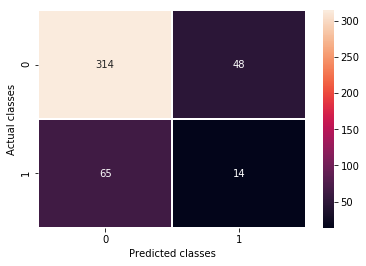

In [101]:
## Confusion Matrix
print("Confusion Matrix::")
conf_mat_lr = confusion_matrix(y_test,pred)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr,annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [102]:
## Classification Report
print("Classification Report: ","\n",classification_report(y_test,pred))

Classification Report:  
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       362
           1       0.23      0.18      0.20        79

   micro avg       0.74      0.74      0.74       441
   macro avg       0.53      0.52      0.52       441
weighted avg       0.72      0.74      0.73       441



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [103]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

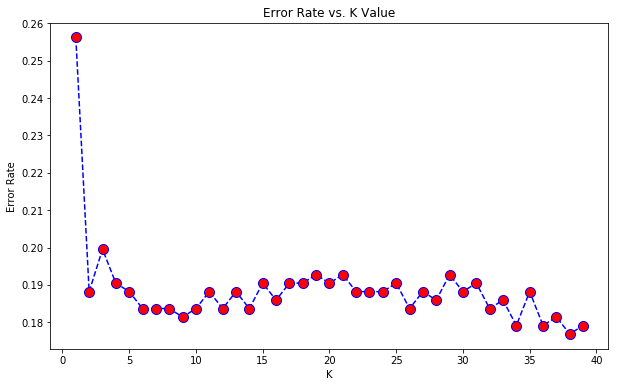

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>5 the error rate just tends to hover around 0.18-016 Let's retrain the model with that and check the classification report!

WITH K=1
[[314  48]
 [ 65  14]]


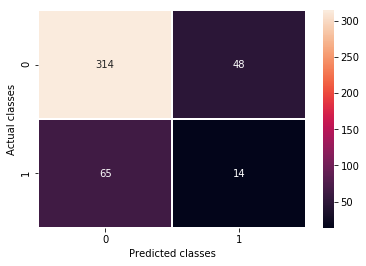

In [108]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print(confusion_matrix(y_test,pred))
sns.heatmap(conf_mat_lr,annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

WITH K=5


[[352  10]
 [ 73   6]]


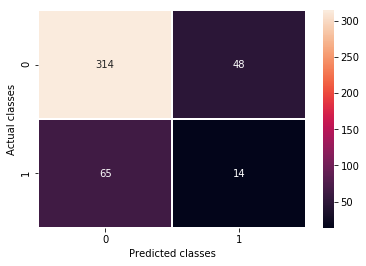

In [111]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
sns.heatmap(conf_mat_lr,annot = True,fmt="d",linewidths=.5) 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

# --------------------------------------------------------------------------------------------------------------

# Naive Bayes with Python

## Import Libraries

In [85]:
# importing Library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [86]:
# Importing Dataset
dataframe=dataframe=pd.read_csv(r"C:\Users\Prachi Gopalani\Desktop\Phyton programming course\Advanced\IBM Attrition Data.csv")

In [87]:
# Top 5 Rows
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


## Dummy Variables

In [88]:
dataframe = pd.get_dummies(dataframe, columns=['Attrition','EducationField','Department','MaritalStatus'], drop_first=True)
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,0,1,0,0,1,0,1,0


## Scaled Features

In [89]:
## Chosen features after checking Significance level
feature_cols = ['Age','EnvironmentSatisfaction','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','JobSatisfaction',
               'MaritalStatus_Single','WorkLifeBalance']
X = dataframe[feature_cols] # Features
y = dataframe.Attrition_Yes # Target variable

## Train Test Split

In [90]:
## Importing library for training and testing
from sklearn.model_selection import train_test_split

In [91]:
## Taking 70:30 Ratio of Training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1029, 8)
(441, 8)
(1029,)
(441,)


In [93]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [94]:
## Importing library for Confusion Matrix and Acuuracy Score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [95]:
# bulding the NB model
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
# predicting train set to calculate acuracy of NB model
predicted_classes_nb = model_nb.predict(X_train)

In [97]:
print("Confusion Matrix for NB model::")
conf_mat_nb = confusion_matrix(Y_train.tolist(),predicted_classes_nb)
print(conf_mat_nb)

Confusion Matrix for NB model::
[[854  14]
 [134  27]]


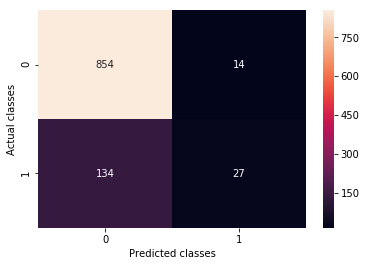

In [98]:
sns.heatmap(conf_mat_nb,annot = True,fmt="d") 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [99]:
accuracy_nb = accuracy_score(Y_train,predicted_classes_nb)
print("accuracy score (train) for NB model::", accuracy_nb)

accuracy score (train) for NB model:: 0.8561710398445093


In [100]:
### Test SET
predicted_test_classes_nb = model_nb.predict(X_test)

Confusion Matrix (Test set) for NB model::
[[359   6]
 [ 64  12]]


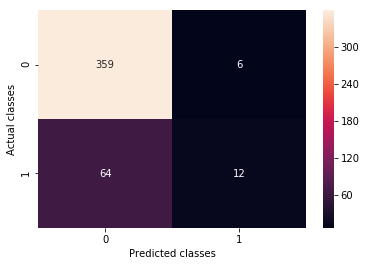

In [101]:
print("Confusion Matrix (Test set) for NB model::")
conf_mat_test_nb = confusion_matrix(Y_test.tolist(),predicted_test_classes_nb)
print(conf_mat_test_nb)
sns.heatmap(conf_mat_test_nb,annot = True,fmt="d") 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

In [102]:
accuracy_test_nb = accuracy_score(Y_test,predicted_test_classes_nb)
print("accuracy score - Naive Bayes (Test set)::", accuracy_test_nb)

accuracy score - Naive Bayes (Test set):: 0.8412698412698413


# --------------------------------------------------------------------------------------------------------------

# SVM with Python

## Importing Library

In [18]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [19]:
# Importing the datasets
dataframe = pd.read_csv(r"C:\Users\Prachi Gopalani\Desktop\Phyton programming course\Advanced\IBM Attrition Data.csv")

In [20]:
## Matrix Shape
dataframe.shape

(1470, 13)

In [21]:
#Top 5 rows
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


## Dummy Varibales

In [22]:
dataframe = pd.get_dummies(dataframe, columns=['Attrition','EducationField','Department','MaritalStatus'], drop_first=True)
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,0,1,0,0,1,0,1,0


## Relevent Features

In [23]:
feature_cols = ['Age','EnvironmentSatisfaction','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','JobSatisfaction',
               'MaritalStatus_Single','WorkLifeBalance']
X = dataframe[feature_cols] # Features
y = dataframe.Attrition_Yes # Target variable

## Train Test split

In [24]:
## Splitting the data in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [25]:
## Training the Algorithm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [26]:
## Making Predictions
y_pred = svclassifier.predict(X_test)

In [27]:
## Evaluating th Alogrithm
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report: ","\n",classification_report(y_test,y_pred))

Accuracy: 0.8390022675736961
Classification Report:  
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       368
           1       0.54      0.18      0.27        73

   micro avg       0.84      0.84      0.84       441
   macro avg       0.70      0.57      0.59       441
weighted avg       0.80      0.84      0.80       441



Confusion Matrix (Test set) model::
[[357  11]
 [ 60  13]]


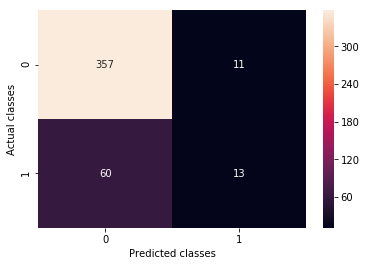

In [28]:
print("Confusion Matrix (Test set) model::")
conf_mat_test_nb = confusion_matrix(y_test,y_pred)
print(conf_mat_test_nb)
sns.heatmap(conf_mat_test_nb,annot = True,fmt="d") 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

# --------------------------------------------------------------------------------------------------------------

# Decision Tree

In [29]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [30]:
dataframe=pd.read_csv("C://Users//Prachi Gopalani//Desktop//Phyton programming course//IBM Attrition Data.csv")

In [31]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [32]:
dataframe = pd.get_dummies(dataframe, columns=['Attrition','EducationField','Department','MaritalStatus'], drop_first=True)
dataframe.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,1,0,0,0,0,0,1,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,0,0,1,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,0,0,0,1,0,1,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,0,0,1,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,0,0,1,0,0,1,0,1,0


In [33]:
feature_cols = ['Age','EnvironmentSatisfaction','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','JobSatisfaction',
               'MaritalStatus_Single','WorkLifeBalance']
X = dataframe[feature_cols] # Features
y = dataframe.Attrition_Yes # Target variable

## Train Test Split

Let's split up the data into a training set and a test set!

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree Classifier

We'll start just by training a single decision tree.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [70]:
predictions = dtree.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       361
           1       0.00      0.00      0.00        80

   micro avg       0.82      0.82      0.82       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.67      0.82      0.74       441



C:\Users\Prachi Gopalani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Prachi Gopalani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Prachi Gopalani\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
print(confusion_matrix(y_test,predictions))

[[361   0]
 [ 80   0]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [74]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[0:])
features


['Age',
 'EnvironmentSatisfaction',
 'MonthlyIncome',
 'DistanceFromHome',
 'NumCompaniesWorked',
 'JobSatisfaction',
 'MaritalStatus_Single',
 'WorkLifeBalance']

In [75]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Prachi Gopalani/Anaconda3/Library/bin/graphviz'

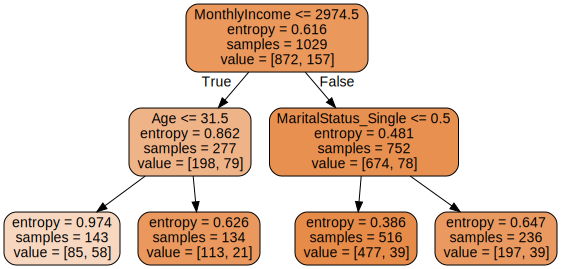

In [76]:
from sklearn.tree import export_graphviz
import graphviz
import pydot

export_graphviz(dtree, out_file="mytree.dot",feature_names=features,filled=True,rounded=True)

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


# --------------------------------------------------------------------------------------------------------------

## Random Forests

Now let's compare the decision tree model to a random forest.

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
rfc_pred = rfc.predict(X_test)

[[353   9]
 [ 71   8]]


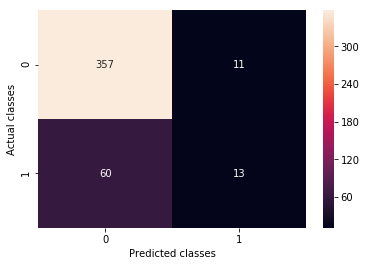

Accuracy: 0.7981859410430839


In [116]:

print(confusion_matrix(y_test,rfc_pred))
sns.heatmap(conf_mat_test_nb,annot = True,fmt="d") 
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       361
           1       0.50      0.09      0.15        80

   micro avg       0.82      0.82      0.82       441
   macro avg       0.66      0.53      0.52       441
weighted avg       0.77      0.82      0.76       441



# --------------------------------------------------------------------------------------------------------------